In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

In [2]:
def load_data(data_path):
    data = []
    with open(data_path, 'r', encoding='utf8') as f:
        text = f.readlines()
        for line in text:
            if line != '\n':
                data.append(line.strip())
    return data

In [3]:
DATA_PATH="./dataset/IELTS_Writing_Sample.txt"
data = load_data(DATA_PATH)
data

["Experts throughout both the developing and developed world have debated whether the advent of sophisticated modern technology such as mobile phones, laptops and iPad have helped to enhance and improve people's social lives or whether the opposite has become the case.",
 'Personally, I strongly advocate the former view. This essay will discuss both sides using examples from the UK government and Oxford University to demonstrate points and prove arguments.',
 'On the one hand there is ample, powerful, almost daily evidence that such technology can be detrimental especially to the younger generation who are more easily affected by it’s addictive nature and which can result in people feeling more isolated from the society.',
 'The central reason behind this is twofold, firstly, the invention of online social media sites and apps, such as Twitter and Facebook have reduced crucial face-to-face interactions dramatically. Through use of these appealing and attractive mediums, people feel in 

In [4]:
sentences = []
for line in data:
    sentences.extend([s.strip() for s in line.split('.') if s != ''])
len(sentences)

673

In [5]:
# plot sentense length
import matplotlib.pyplot as plt
plt.hist(list(map(len, sentences)))

ModuleNotFoundError: No module named 'matplotlib'

In [6]:
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

In [7]:
tokenizer.word_index

{'<OOV>': 1,
 'the': 2,
 'in': 3,
 'to': 4,
 'of': 5,
 'and': 6,
 'a': 7,
 'is': 8,
 'that': 9,
 'for': 10,
 'with': 11,
 'this': 12,
 'be': 13,
 'it': 14,
 'are': 15,
 'more': 16,
 'have': 17,
 'as': 18,
 'from': 19,
 'by': 20,
 'has': 21,
 'such': 22,
 'on': 23,
 'can': 24,
 'over': 25,
 'or': 26,
 'which': 27,
 'there': 28,
 'their': 29,
 'at': 30,
 'were': 31,
 'than': 32,
 'been': 33,
 'people': 34,
 'example': 35,
 'an': 36,
 'children': 37,
 'was': 38,
 'number': 39,
 'time': 40,
 'they': 41,
 'women': 42,
 'i': 43,
 'both': 44,
 'countries': 45,
 'therefore': 46,
 'new': 47,
 'should': 48,
 'only': 49,
 'two': 50,
 'would': 51,
 'will': 52,
 'education': 53,
 'many': 54,
 'if': 55,
 'other': 56,
 'years': 57,
 'however': 58,
 '000': 59,
 'who': 60,
 'could': 61,
 'year': 62,
 'most': 63,
 'shows': 64,
 'these': 65,
 '2015': 66,
 'one': 67,
 'use': 68,
 'because': 69,
 'also': 70,
 'just': 71,
 'work': 72,
 'learning': 73,
 'between': 74,
 'university': 75,
 'had': 76,
 'around'

In [8]:
# Save tokenizer
import json
json.dump(tokenizer.word_index, open('word2index.json', 'w', encoding='utf8'))
json.dump(tokenizer.index_word, open('index2word.json', 'w', encoding='utf8'))

In [9]:
SENTENCE_LENGTH = 100
VOCAB_SIZE = 5000

padded_sequences = pad_sequences(sequences, maxlen=SENTENCE_LENGTH, padding='pre')
padded_sequences[0]

sequences = []
for line in sentences:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		sequences.append(n_gram_sequence)

# Pad sequences for equal input length 
max_sequence_len = max([len(seq) for seq in sequences])
sequences = np.array(pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))

# Split sequences between the "input" sequence and "output" predicted word
input_sequences, labels = sequences[:,:-1], sequences[:,-1]
# One-hot encode the labels
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=VOCAB_SIZE)


In [11]:
max_sequence_len

66

In [12]:
def create_model(maxlen):
    model = Sequential([
        Embedding(VOCAB_SIZE, 128, input_length=maxlen-1),
        Bidirectional(LSTM(64, return_sequences=True)),
        Bidirectional(LSTM(64)),
        Dense(VOCAB_SIZE, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [13]:
model = create_model(max_sequence_len)
history = model.fit(input_sequences,one_hot_labels, epochs=200, verbose=1)

Epoch 1/200
423/423 [==============================] - 24s 36ms/step - loss: 6.9815 - accuracy: 0.05510s - loss: 6.9841 - ac
Epoch 2/200
423/423 [==============================] - 15s 37ms/step - loss: 6.3766 - accuracy: 0.07150s - loss: 6.3
Epoch 3/200
423/423 [==============================] - 15s 35ms/step - loss: 6.1891 - accuracy: 0.0831: 14s - loss: 6.2343 - accu - ETA: 14s - loss: 6.1291 - accuracy: 0 - ETA: 13s - loss: 6.1594 - accu - ETA: 12s - loss: 6.2118 - ETA: 11s - loss: 6.1791 - ac - ETA: 10s - loss: 6.1
Epoch 4/200
423/423 [==============================] - 15s 35ms/step - loss: 6.0436 - accuracy: 0.0955: 13s - loss: 5.9988 - accuracy: 0 - ETA: 13s - loss: 6.0152 - accuracy: 0 - ETA: 13s - loss: 5.9755 - accuracy: 0.1 - ETA: 13s - loss: 5.9898 - accuracy: 0.103 - ETA: 13s - loss: 5.9811 - - ETA: 11s - loss: 5.9873 - accuracy: 0.0 
Epoch 5/200
423/423 [==============================] - 15s 35ms/step - loss: 5.8885 - accuracy: 0.1080
Epoch 6/200
423/423 [=================

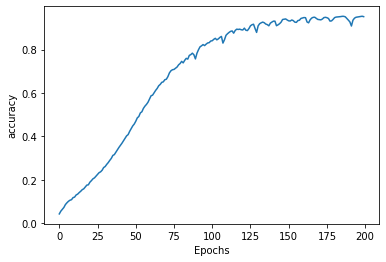

In [16]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [13]:
def predict(inp, next_len=3):
    for _ in range(next_len):
        token_list = tokenizer.texts_to_sequences([inp])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted_probs = model.predict(token_list)[0]
        predicted = np.random.choice([x for x in range(len(predicted_probs))],
                                    p=predicted_probs)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        inp += " " + output_word
    return inp

def suggest(inp, num_of_result, from_len, to_len):
    result = []
    for len in range(from_len,to_len):
        for _ in range(num_of_result):
            r = predict(inp, next_len=len)
            if r not in result:
                result.append(r)
    return result

In [15]:
model.save('model.h5')

In [ ]:
@tf.function
def encode_text(text):
    token_list = tokenizer.texts_to_sequences([text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    return token_list

@tf.function
def decode_result(result):
    predicted = np.random.choice([x for x in range(len(result))],p=result)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    return output_word

In [ ]:
encode_text_tf = tf.function(encode_text)
decode_result_tf = tf.function(decode_result)

In [ ]:
suggest("He's a",3,3,8)

In [ ]:
# converter = tf.lite.TFLiteConverter.from_concrete_functions([encode_text_tf.get_concrete_function(tf.TensorSpec(shape=None, dtype=tf.string)),
#  decode_result_tf.get_concrete_function(tf.TensorSpec(shape=[None], dtype=tf.float32))])

converter = tf.lite.TFLiteConverter.from_concrete_functions([encode_text.get_concrete_function(tf.TensorSpec(shape=(),dtype=tf.strings)),decode_result])

tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
class WritingModel(tf.keras.Model):
    def __init__(self, vocab_size, max_len, tokenizer):
        self.tokenizer = tokenizer
        super(WritingModel, self).__init__()

        self.emb1 = tf.keras.layers.Embedding(vocab_size, 128, input_length=max_len-1)
        self.bi_lstm1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))
        self.bi_lstm2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))
        self.dense1 = tf.keras.layers.Dense(vocab_size, activation='softmax')
        
    def call(self, x):
        x = self.emb1(x)
        x = self.bi_lstm1(x)
        x = self.bi_lstm2(x)
        x = self.dense1(x)
        return x
    
    # @tf.function(input_signature=[tf.TensorSpec((1),tf.int32)])
    def custom_predict(self,inp, next_len=3):
        for _ in range(next_len):
            token_list = self.tokenizer.texts_to_sequences([inp])[0]
            token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
            predicted_probs = self.predict(token_list)[0]
            predicted = np.random.choice([x for x in range(len(predicted_probs))],
                                        p=predicted_probs)
            output_word = ""
            for word, index in self.tokenizer.word_index.items():
                if index == predicted:
                    output_word = word
                    break
            inp += " " + output_word
        return inp

    @tf.function(input_signature=[tf.TensorSpec((1),tf.string),tf.TensorSpec((None),tf.int32),tf.TensorSpec((None),tf.int32),tf.TensorSpec((None),tf.int32)])
    def suggest(self,inp, num_of_result, from_len, to_len):
        result = []
        for len in range(from_len,to_len):
            for _ in range(num_of_result):
                r = self.custom_predict(inp.numpy(), len)
                if r not in result:
                    result.append(r)
        return result

In [ ]:
max_sequence_len

In [ ]:
saving_model = WritingModel(VOCAB_SIZE, max_sequence_len,tokenizer)
saving_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
saving_model.build(input_shape=(1,max_sequence_len))
saving_model.summary()
saving_model.fit(input_sequences,one_hot_labels, epochs=1, verbose=1)

In [ ]:
# Save model
saving_model.save('model1', save_format='tf')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(saving_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter=True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()

In [ ]:
open('model.tflite', 'wb').write(tflite_model)


In [ ]:
# load saved model
loaded_model = tf.keras.models.load_model('model1')

In [ ]:
loaded_model.custom_predict()